In [1]:
import pandas as analytics
import numpy as maths
import matplotlib.pyplot as graph
import os
from math import exp

In [2]:
from math import exp

In [3]:
os.chdir('../dependencies/')
from logistic_regression import logistic_regression

In [4]:
def loss(f_x,y):
    return -(y*f_x + (1-y)*(1-f_x))
    

In [5]:
filename = 'data1'
validation_perc = 0.7
training_perc = 0.7
alphas = maths.arange(0,1,0.1)
number_of_iterations = 10
training_perc = 0.7

In [6]:
log_reg = logistic_regression()
log_reg.load_data(filename)
df_validation, df_test = log_reg.split_dataset(validation_perc , training_perc)
# log_reg.find_weights(alphas, number_of_iterations )
# log_reg.classify(df_test)

In [7]:
df_validation

,x0,x1,x2,y
90,1,14,25,1
63,1,15,41,1
174,1,49,32,0
146,1,44,5,0
154,1,39,27,0
...,...,...,...,...
71,1,16,33,1
83,1,33,48,1
32,1,10,26,1
42,1,1,11,1


In [8]:
df_validation['x1'] = (df_validation['x1'] - max(df_validation['x1'])) / (max(df_validation['x1']) - min(df_validation['x1'])) 
df_validation['x2'] = (df_validation['x2'] - max(df_validation['x2'])) / (max(df_validation['x2']) - min(df_validation['x2'])) 
df_validation

,x0,x1,x2,y
90,1,-0.734694,-0.510204,1
63,1,-0.714286,-0.183673,1
174,1,-0.020408,-0.367347,0
146,1,-0.122449,-0.918367,0
154,1,-0.224490,-0.469388,0
...,...,...,...,...
71,1,-0.693878,-0.346939,1
83,1,-0.346939,-0.040816,1
32,1,-0.816327,-0.489796,1
42,1,-1.000000,-0.795918,1


In [9]:
def norm(vector):
    vector = [v**2 for v in vector]
    vector = float(sum(vector))
    vector = vector ** 0.5
    return vector

def sigmoid(x,w):
#     print(w.shape,x.shape)
    f_x = 1/(1 + exp(-float(maths.matmul(w.T,x)))) 
    
    return f_x

In [10]:
X = df_validation.iloc[:,:-1]
Y = df_validation.iloc[:,-1]

w_star = maths.matrix(maths.random.rand(X.shape[1])).T

w_old = w_star + [1]

iteration_number = 1

epsilon = 1e-3
alpha = 0.1
norms = [1]
losses = []
cost = []

while norms[-1] > epsilon :
    w_old = w_star
    iteration_number = iteration_number + 1
    for i in range(len(X)):
        x = maths.matrix(X.iloc[i]).T
        y = Y.iloc[i]
        f_x = sigmoid(x,w_star)
        w_star = w_star + alpha * (y - f_x) * x
        losses.append(loss(f_x,y))
        
    norms.append(norm( w_star - w_old ))
    cost.append(sum(losses))
    
        
    
figure = graph.figure(figsize = (15,10))
graph.ylabel("Norms")
graph.xlabel("Iterations")
# graph.plot(norms)
graph.plot(cost)
graph.grid(True)
print(w_star)
print(len(norms))

KeyboardInterrupt: 

In [ ]:
norms[2] > epsilon

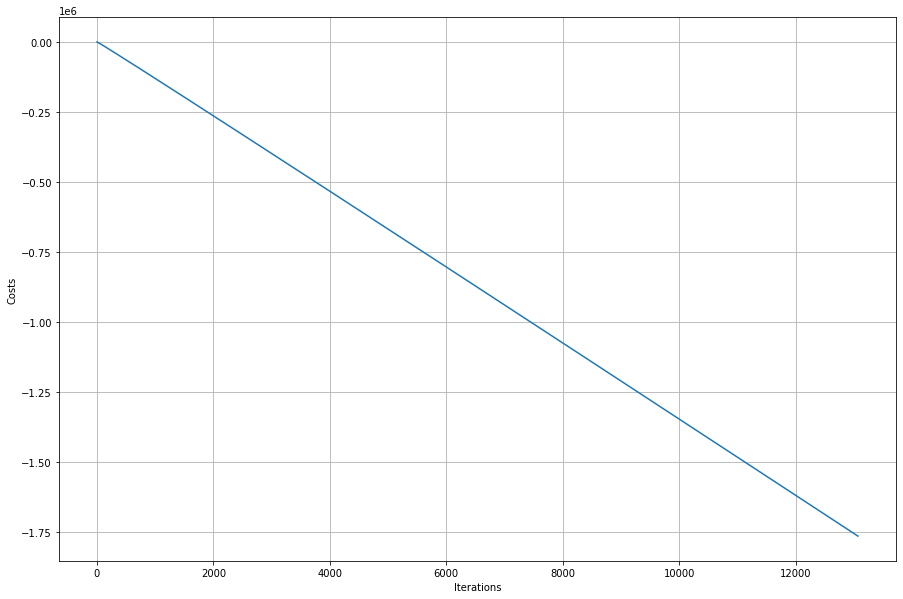

In [11]:
figure = graph.figure(figsize = (15,10))
graph.ylabel("Costs")
graph.xlabel("Iterations")
# graph.plot(norms)
graph.plot(cost)
graph.grid(True)

[[-10.1947943 ]
 [-79.39893761]
 [ 68.21744829]]


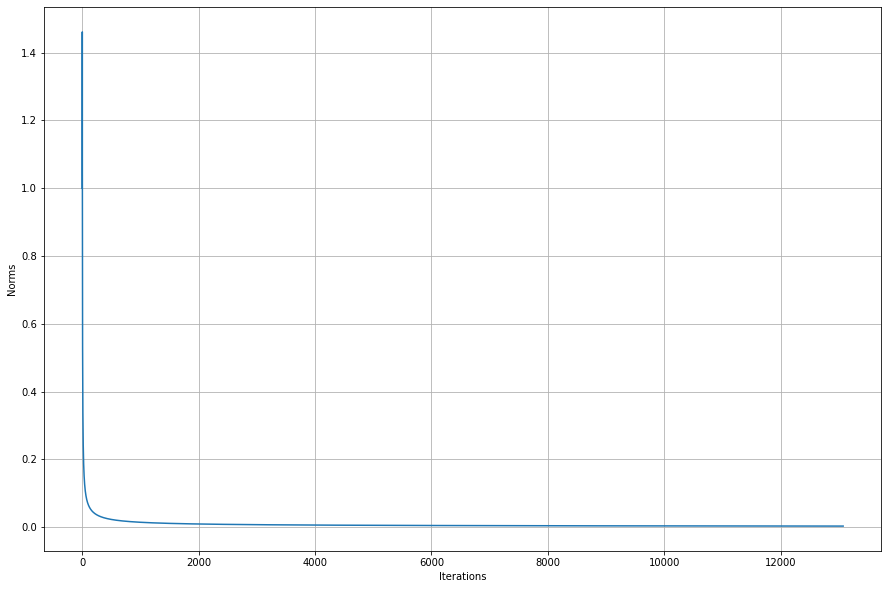

In [12]:
figure = graph.figure(figsize = (15,10))
graph.ylabel("Norms")
graph.xlabel("Iterations")
graph.plot(norms)
graph.grid(True)
print(w_star)

[[-10.1947943 ]
 [-79.39893761]
 [ 68.21744829]]


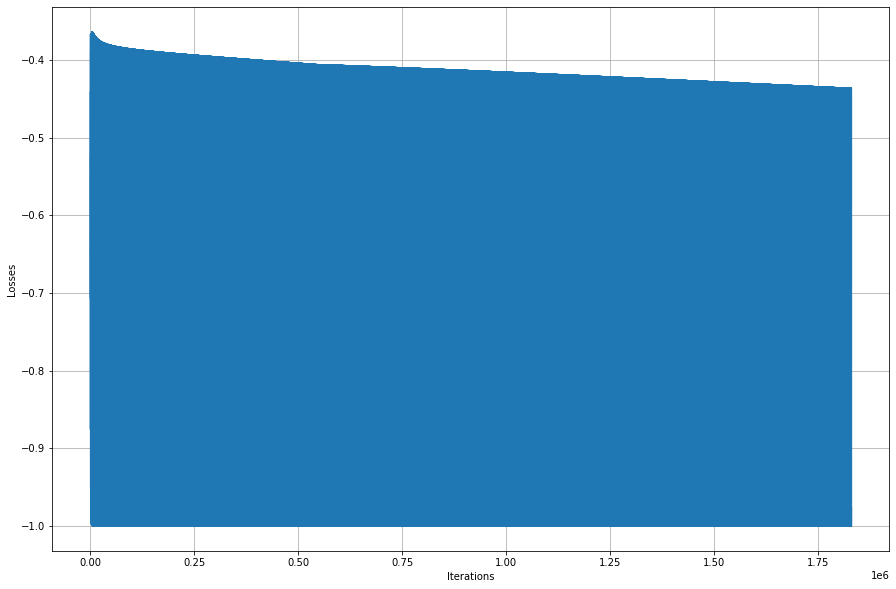

In [13]:
figure = graph.figure(figsize = (15,10))
graph.ylabel("Losses")
graph.xlabel("Iterations")
graph.plot(losses)
graph.grid(True)
print(w_star)